Importing Dependencies

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
#loading the data and data analysis
insurance_data=pd.read_csv('/content/insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#number of rows and columns
insurance_data.shape

(1338, 7)

In [5]:
#information of the data
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#checkingg for the missing values
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [7]:
insurance_data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

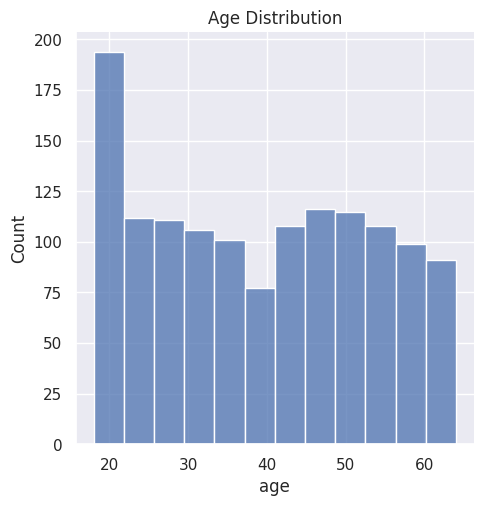

In [12]:
#distrubution of age

sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

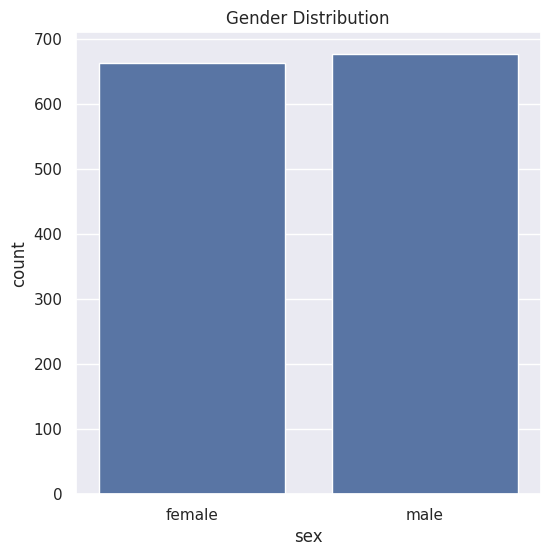

In [13]:
#distrubution on gender
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title('Gender Distribution')
plt.show()


OR

In [14]:
insurance_data['sex'].value_counts()

,count
sex,
male,676
female,662


<Figure size 600x600 with 0 Axes>

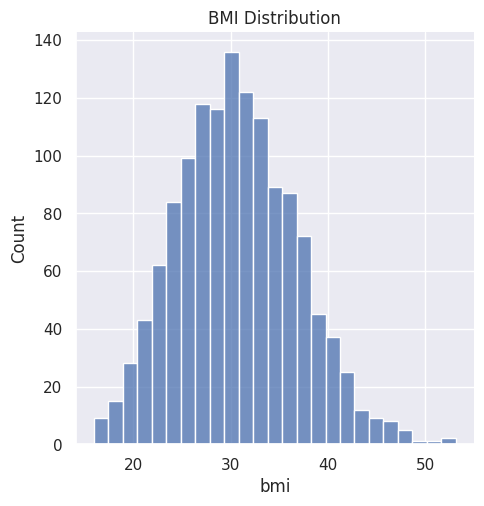

In [16]:
#BMI distrubution
plt.figure(figsize=(6,6))
sns.displot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range -- > 18.5 to 24.9

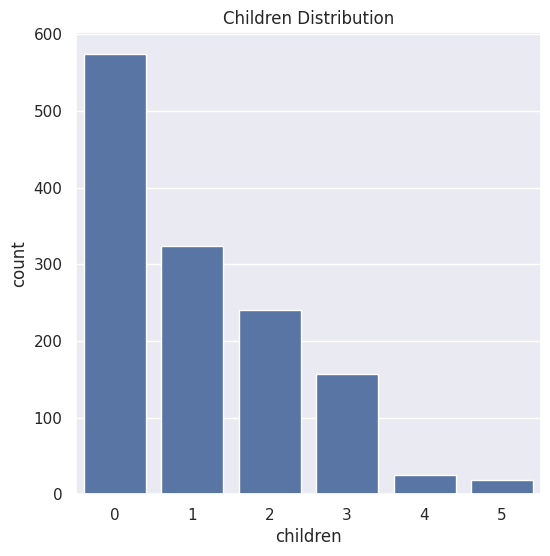

In [18]:
#distrubution on children
#countplot since the values are limited

plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title('Children Distribution')
plt.show()

OR


In [19]:
insurance_data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


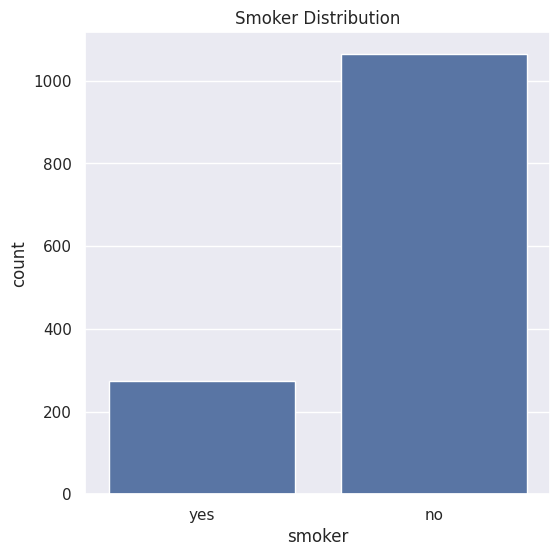

In [20]:
#Distrubution on smoker


plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title('Smoker Distribution')
plt.show()

OR to know the exaact values

In [21]:
insurance_data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


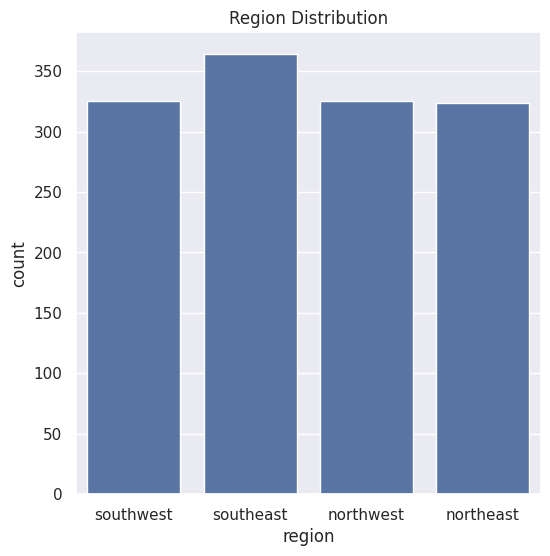

In [22]:
#distrubution on region

plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('Region Distribution')
plt.show()

In [23]:
insurance_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Figure size 600x600 with 0 Axes>

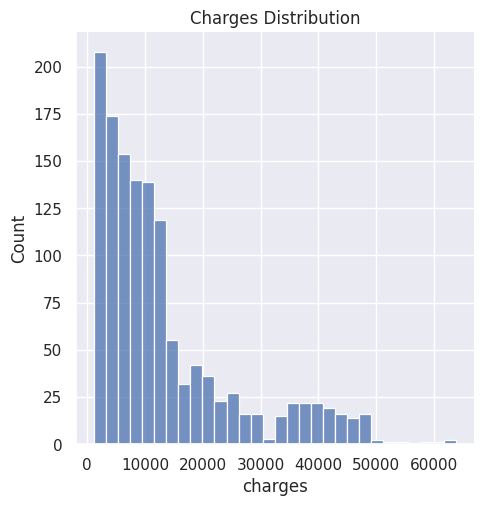

In [25]:
#Distrubution on charges
plt.figure(figsize=(6,6))
sns.displot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

Data Preprocessing

Encoding

In [27]:
#encoding the sex column
insurance_data.replace({'sex':{'male':0, 'female':1}},inplace=True)

#encoding the smoker column
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding the region column
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

/tmp/ipython-input-27-156934475.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'sex':{'male':0, 'female':1}},inplace=True)
/tmp/ipython-input-27-156934475.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/tmp/ipython-input-27-156934475.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

In [28]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the data into features AND target

In [31]:
X = insurance_data.drop(columns='charges',axis=1)
Y= insurance_data['charges']

In [32]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [33]:
#splitting the data into training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [35]:
regresser= LinearRegression()

In [36]:
regresser.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [37]:
#training data
training_data_prediction = regresser.predict(X_train)

In [39]:
#r2 evaluation
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2_train)


R Squared value =  0.751505643411174


In [40]:
#Testing data
test_data_prediction = regresser.predict(X_test)

In [41]:
#r2 evaluation on testing data
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value = ', r2_test)


R Squared value =  0.7447273869684076


Predictive System

In [43]:
input_data=(46,1,33.44,1,1,0)

#Coverting the input_data to array
input_data_as_array=np.asarray(input_data)

#reshaping
reshaped_data=input_data_as_array.reshape(1, -1)

prediction=regresser.predict(reshaped_data)
print(prediction)

print('The insurance cost is ',prediction[0])


[10657.40884992]
The insurance cost is  10657.408849921467


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
